In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_set = pd.read_csv('Social_Network_Ads.csv')
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


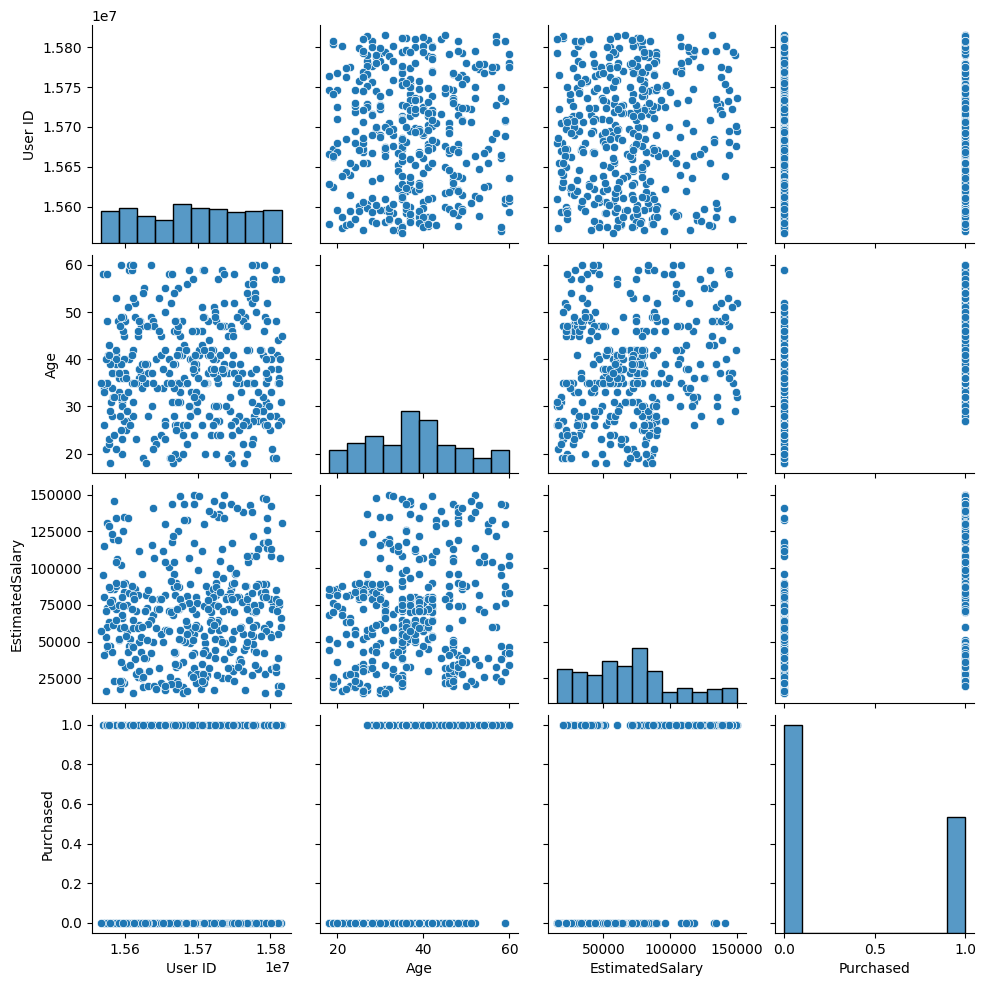

In [2]:
sns.pairplot(data_set)

In [3]:
data_set = pd.get_dummies(data_set, drop_first=True)
data_set

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_set, random_state=100, train_size=0.9)
train_df['source'] = 'train'
test_df['source'] = 'test'

In [5]:
raw_df = pd.concat([train_df, test_df], axis=0)

In [6]:
raw_df

,User ID,Age,EstimatedSalary,Purchased,Gender_Male,source
136,15668504,20,82000,0,0,train
54,15654901,27,58000,0,0,train
75,15651983,34,112000,1,1,train
369,15624755,54,26000,1,0,train
258,15569641,58,95000,1,0,train
...,...,...,...,...,...,...
271,15688172,59,76000,1,0,test
7,15694829,32,150000,1,0,test
263,15767681,35,72000,0,0,test
129,15792102,26,84000,0,0,test


In [7]:
from statsmodels.api import add_constant
raw_df = add_constant(raw_df)

In [8]:
raw_df.drop(['User ID'], axis=1, inplace=True)
raw_df

,const,Age,EstimatedSalary,Purchased,Gender_Male,source
136,1.0,20,82000,0,0,train
54,1.0,27,58000,0,0,train
75,1.0,34,112000,1,1,train
369,1.0,54,26000,1,0,train
258,1.0,58,95000,1,0,train
...,...,...,...,...,...,...
271,1.0,59,76000,1,0,test
7,1.0,32,150000,1,0,test
263,1.0,35,72000,0,0,test
129,1.0,26,84000,0,0,test


In [9]:
train_x = raw_df[raw_df['source'] == 'train'].drop(['source', 'Purchased'], axis = 1)
train_y = raw_df[raw_df['source'] == 'train']['Purchased']
test_x = raw_df[raw_df['source'] == 'test'].drop(['source', 'Purchased'], axis = 1)
test_y = raw_df[raw_df['source'] == 'test']['Purchased']

In [10]:
train_x

,const,Age,EstimatedSalary,Gender_Male
136,1.0,20,82000,0
54,1.0,27,58000,0
75,1.0,34,112000,1
369,1.0,54,26000,0
258,1.0,58,95000,0
...,...,...,...,...
343,1.0,47,51000,0
359,1.0,42,54000,1
323,1.0,48,30000,0
280,1.0,59,88000,0


In [11]:
train_y

136    0
54     0
75     1
369    1
258    1
      ..
343    1
359    0
323    1
280    1
8      0
Name: Purchased, Length: 360, dtype: int64

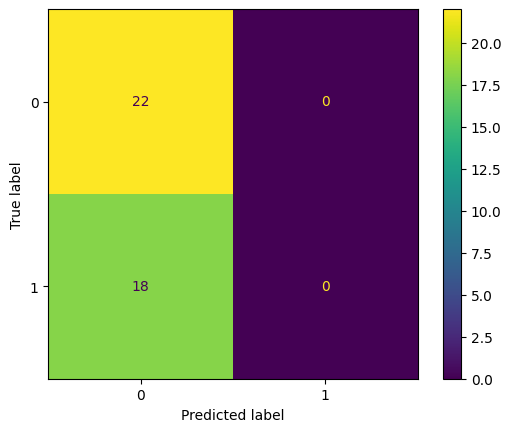

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X=train_x, y=train_y)

from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
ConfusionMatrixDisplay.from_estimator(model, test_x, test_y)

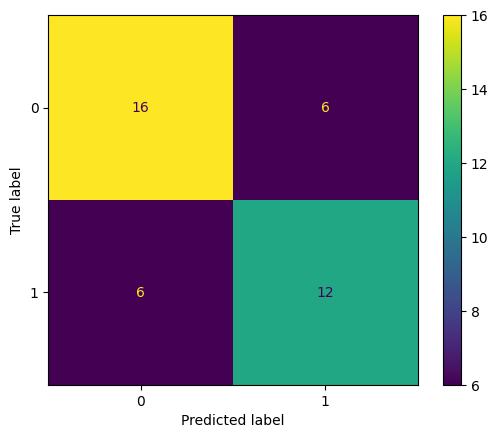

In [13]:
raw_df['Age'] = raw_df['Age'] - raw_df[raw_df['source'] == 'train']['Age'].mean()
train_x = raw_df[raw_df['source'] == 'train'].drop(['source', 'Purchased'], axis = 1)
train_y = raw_df[raw_df['source'] == 'train']['Purchased']
test_x = raw_df[raw_df['source'] == 'test'].drop(['source', 'Purchased'], axis = 1)
test_y = raw_df[raw_df['source'] == 'test']['Purchased']
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X=train_x, y=train_y)

from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
ConfusionMatrixDisplay.from_estimator(model, test_x, test_y)